In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
book = pd.read_csv('bookss.csv')

In [7]:
book.head(10)

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
5,6,276744,The Kitchen God's Wife,7
6,7,276745,What If?: The World's Foremost Military Histor...,10
7,8,276747,PLEADING GUILTY,9
8,9,276747,Under the Black Flag: The Romance and the Real...,9
9,10,276747,Where You'll Find Me: And Other Stories,8


In [6]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [10]:
books=book.iloc[:,1:]
books

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [13]:
books['Book.Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [14]:
len(books['Book.Title'].unique())

9659

In [17]:
# ratings given
books['Book.Rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book.Rating, dtype: int64

In [19]:
ratings=books['Book.Rating'].value_counts().sort_values(ascending=False)
ratings

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book.Rating, dtype: int64

<Axes: title={'center': 'Rating'}>

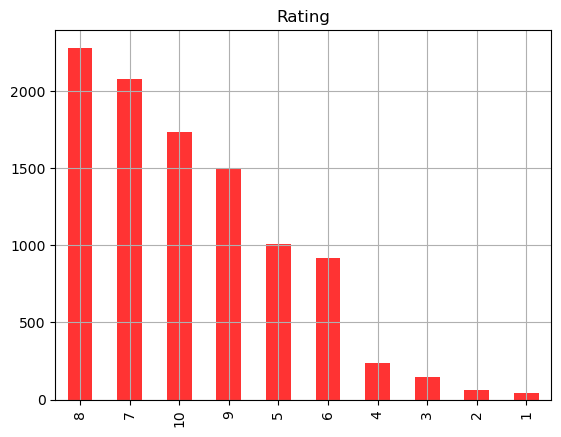

In [21]:
ratings.plot(kind='bar',color= 'red',alpha=0.8,grid=True,title ='Rating')

In [26]:
book1=books.rename({'Book.Title':'Book_title','Book.Rating':'Rating'},axis=1)
book1

,User.ID,Book_title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [29]:
book1.groupby('Book_title').agg('count').Rating.sort_values(ascending = False)

Book_title
Fahrenheit 451                                              5
Vanished                                                    4
The Amber Spyglass (His Dark Materials, Book 3)             4
The Subtle Knife (His Dark Materials, Book 2)               4
Stardust                                                    4
                                                           ..
His Only Desire (Double Exposure) (Intrigue, 627)           1
His and Hers: Ranchin' Dads (Harlequin - Western Lovers)    1
His-And-Hers Twins (Harlequin American Romance, No. 820)    1
Histoires Extraordinaires                                   1
stardust                                                    1
Name: Rating, Length: 9659, dtype: int64

In [30]:
avg_rating = book1.groupby('Book_title').agg('mean').Rating.sort_values(ascending = False)
avg_rating

Book_title
Musc                      10.0
The Dance                 10.0
The Dead Zone             10.0
Death of a Don            10.0
The Day I Almost Quit     10.0
                          ... 
Kiss of the Highlander     1.0
Selected Poems             1.0
Children of the Night      1.0
Saucer                     1.0
Aldo Applesauce            1.0
Name: Rating, Length: 9659, dtype: float64

In [32]:
user_book_metrix = pd.pivot_table(data=book1,columns='Book_title',index='User.ID',values='Rating')
user_book_metrix 

Book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN


In [34]:
user_book_metrix.fillna(0,inplace=True)
user_book_metrix 

Book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
user_sim_matrix = cosine_similarity(user_book_metrix )
user_sim_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [38]:
user_sim=pd.DataFrame(user_sim_matrix)
user_sim

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
user_sim.index=book1['User.ID'].unique()
user_sim.columns=book1['User.ID'].unique()
user_sim

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
# Nullifying diagonal values
np.fill_diagonal(user_sim_matrix,0)
user_sim

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Most Similar Users
user_sim.idxmax(axis=1)

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

In [47]:
# extract the books which userId 276813 have Read
id1=book1[book1['User.ID']==276813]
id1

,User.ID,Book_title,Rating
44,276813,Icebound,8
45,276813,I'll Be Seeing You,8
46,276813,From the Corner of His Eye,6
47,276813,Isle of Dogs,8
48,276813,Purity in Death,6
49,276813,This Year It Will Be Different: And Other Stories,6
50,276813,Proxies,8


In [49]:
id2=book1[book1['User.ID']==8]
id2

,User.ID,Book_title,Rating
2399,8,Ancient Celtic Romances,5
2400,8,The Western way: A practical guide to the West...,5
2401,8,Wings,5
2402,8,Truckers,5
2403,8,Keepers of the Earth Teachers Guide,6
2404,8,The Celts Activity Book,6
2405,8,The Art Of Celtia,7


In [50]:
# extract the books which userId 276813 & 8 have read
book1[(book1['User.ID']==276813) | (book1['User.ID']==8)]

,User.ID,Book_title,Rating
44,276813,Icebound,8
45,276813,I'll Be Seeing You,8
46,276813,From the Corner of His Eye,6
47,276813,Isle of Dogs,8
48,276813,Purity in Death,6
49,276813,This Year It Will Be Different: And Other Stories,6
50,276813,Proxies,8
2399,8,Ancient Celtic Romances,5
2400,8,The Western way: A practical guide to the West...,5
2401,8,Wings,5


In [52]:
id1.Book_title

44                                             Icebound
45                                   I'll Be Seeing You
46                           From the Corner of His Eye
47                                         Isle of Dogs
48                                      Purity in Death
49    This Year It Will Be Different: And Other Stories
50                                              Proxies
Name: Book_title, dtype: object

In [53]:
id2.Book_title

2399                              Ancient Celtic Romances
2400    The Western way: A practical guide to the West...
2401                                                Wings
2402                                             Truckers
2403                  Keepers of the Earth Teachers Guide
2404                              The Celts Activity Book
2405                                    The Art Of Celtia
Name: Book_title, dtype: object

In [54]:
pd.merge(id1,id2,on='Book_title',how='outer')

,User.ID_x,Book_title,Rating_x,User.ID_y,Rating_y
0,276813.0,Icebound,8.0,NaN,NaN
1,276813.0,I'll Be Seeing You,8.0,NaN,NaN
2,276813.0,From the Corner of His Eye,6.0,NaN,NaN
3,276813.0,Isle of Dogs,8.0,NaN,NaN
4,276813.0,Purity in Death,6.0,NaN,NaN
5,276813.0,This Year It Will Be Different: And Other Stories,6.0,NaN,NaN
6,276813.0,Proxies,8.0,NaN,NaN
7,NaN,Ancient Celtic Romances,NaN,8.0,5.0
8,NaN,The Western way: A practical guide to the West...,NaN,8.0,5.0
9,NaN,Wings,NaN,8.0,5.0


In [58]:
def get_recommendation(customer_id):
        
        tem=list(user_sim.sort_values([customer_id],ascending=False).head(3).index)

        book_list=list(book1[book1['User.ID'].isin(tem)]['Book_title'])

        recommended_books = set(book_list)-set(book1[book1['User.ID']==customer_id]['Book_title'])
        
        return recommended_books

In [59]:
get_recommendation(162113)

{'Bread, Tomato, Garlic: Quick Cooking With 3 Main Ingredients',
 'Cinnamon (Shooting Stars)',
 'Classical Mythology',
 'Home Song',
 'Spring Fancy',
 'Surrender',
 'Surrender to Love (Avon Historical Romance)',
 "The Ubiquitous Shrimp: From Simple to Exotic, from Feasts to Snacks, All the Wonderful Ways to Savor America's Favorite Seafood"}

In [60]:
get_recommendation(276813)

{'A Man of Steel',
 'Dance the Eagle to Sleep',
 'The Apprentice',
 'The Seventh Night'}

In [61]:
get_recommendation(162129)

{'A Man of Steel',
 'Classical Mythology',
 'The Apprentice',
 'The Seventh Night'}